In [81]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [82]:
data_folder = r"C:\Users\pipi3\Desktop\Course\year3_sem3 (Japan)\FYP\input_data\vgchartz";

In [83]:
#raw data
df = pd.read_excel(data_folder+"\\Global Software Sales by Platform.xlsx", sheetname='2017')
df.head()

,Platform,Year,Change,Total
0,PS4,34563242,(-77%),"388,830,297"
1,XOne,11735146,(-83%),"192,734,533"
2,3DS,10330617,(-80%),"286,558,297"
3,NS,6007138,(-80%),"6,007,138"
4,WiiU,2810918,(-82%),"89,454,691"


In [84]:
#create pivot table (Platform vs Total Sales)
for i in range(12):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Software Sales by Platform.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Year', index=['Platform'], aggfunc='sum')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16], axis=1)
pd.options.display.float_format = '{:,.0f}'.format
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
#dfps = df.fillna(0) #Platform, Sales
dfpsall = df.transpose()
dfpsall.reset_index(level=0, inplace=True)
dfpsall = dfpsall.rename(columns = {'index':'Year'})
dfpsall

,Year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2005,nan,"25,828,840","568,968",nan,nan,"19,943,845",nan,nan,nan,"2,849,162",nan
1,2006,nan,"74,888,738","558,074","2,033,730",nan,"30,305,351",nan,"8,454,915",nan,"25,207,607",nan
2,2007,nan,"109,862,848","2,920,185","37,173,227",nan,"38,699,924",nan,"74,814,653",nan,"61,447,450",nan
3,2008,nan,"155,417,503","5,857,447","88,788,171",nan,"48,081,613",nan,"177,044,396",nan,"108,909,458",nan
4,2009,nan,"143,959,471","6,187,437","96,837,921",nan,"40,816,572",nan,"181,775,778",nan,"107,118,181",nan
5,2010,nan,"121,814,412","15,728,587","131,311,968",nan,"45,302,493",nan,"182,659,103",nan,"133,691,251",nan
6,2011,"26,797,294","81,003,668","29,631,542","148,974,355",nan,"31,654,789","425,230","135,502,236",nan,"154,515,522",nan
7,2012,"38,911,081","39,739,571","32,878,549","126,991,592",nan,"15,054,141","8,885,821","71,605,224","4,509,317","132,807,443",nan
8,2013,"57,731,510","24,036,899","27,715,294","148,439,120","9,589,110","10,709,908","11,017,608","41,539,506","15,103,519","118,392,826","7,757,480"
9,2014,"56,038,733","16,511,577","23,593,586","93,679,585","71,185,626","5,043,694","14,129,507","26,445,607","24,072,311","73,883,965","40,087,279"


In [85]:
%%inactive
dfpsall['Total'] = 0
for i in range(1, 11):
    dfpsall['Total'] += dfpsall[dfpsall.columns[i]].fillna(0)
dfpsall

ERROR:root:Cell magic `%%inactive` not found.


In [86]:
del dfpsall['PC']

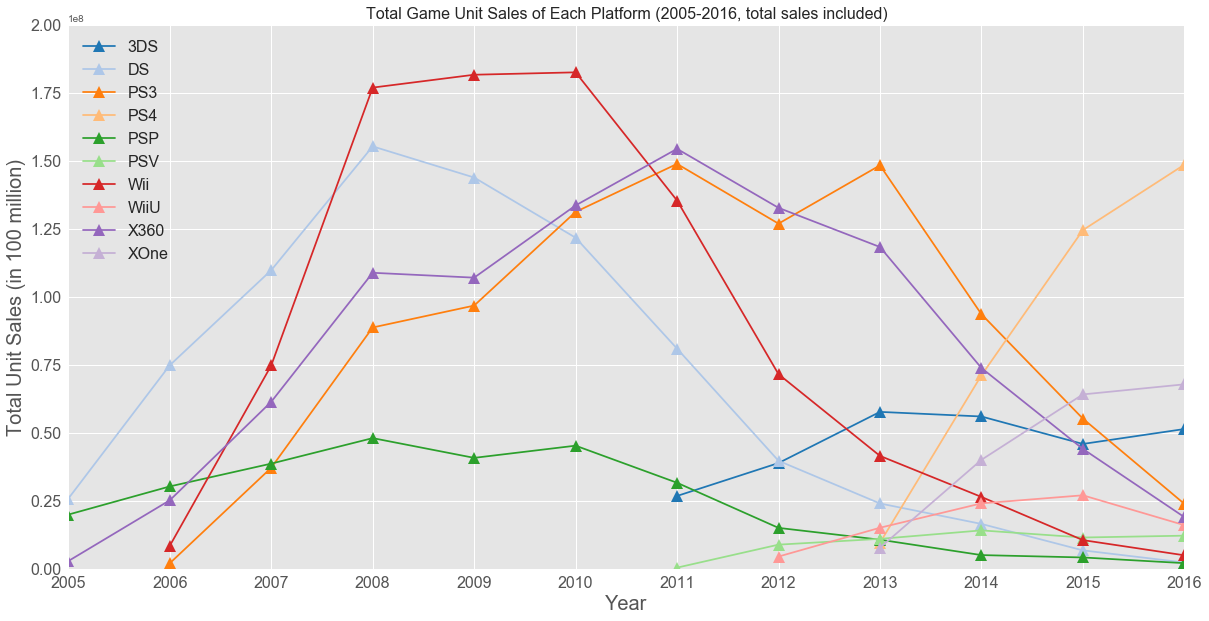

In [87]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
#markers_on = [12, 17, 18, 19]

ax = dfpsall.plot(table=False, figsize=(20,10), color=colors, fontsize=16, marker='^', markersize=12)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Unit Sales (in 100 million)", fontsize=20)
ax.set_xticks(np.arange(len(dfpsall['Year'])))
ax.set_xticklabels(dfpsall['Year'], fontsize=16)
ax.set_ylim([0,200000000])
ax.set_title('Total Game Unit Sales of Each Platform (2005-2016, total sales included)', fontsize=16)
plt.legend(loc='best', fontsize=16)
#ax.get_xaxis().set_visible(True)

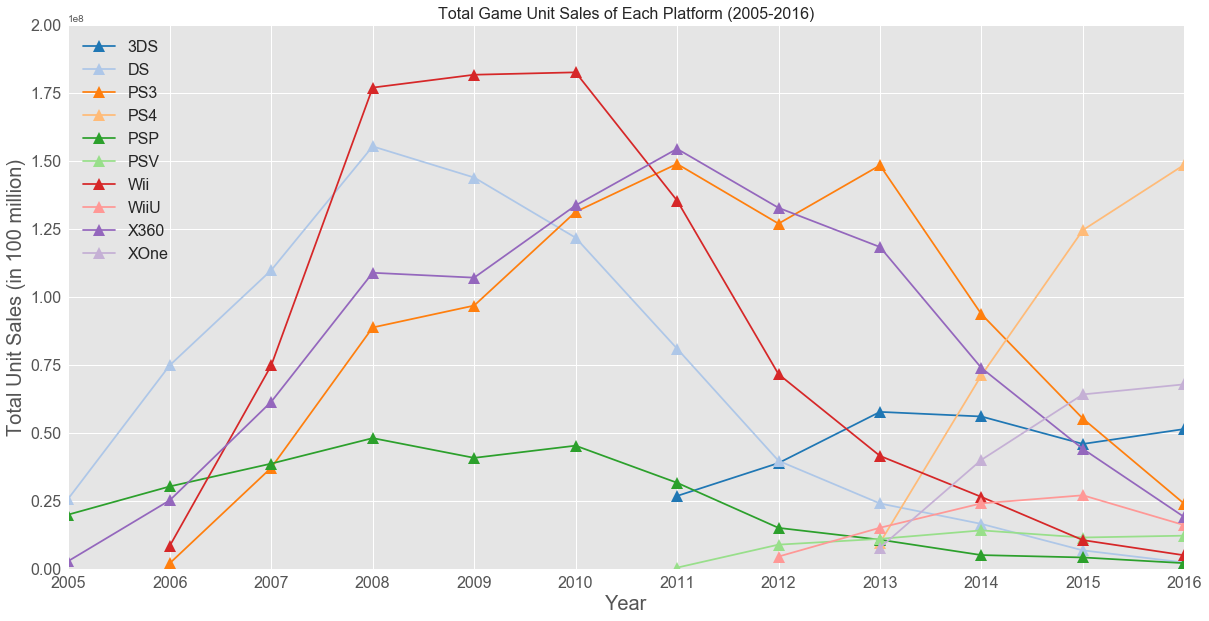

In [88]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
#markers_on = [12, 17, 18, 19]

ax = dfpsall.plot(table=False, figsize=(20,10), color=colors, fontsize=16, marker='^', markersize=12)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Unit Sales (in 100 million)", fontsize=20)
ax.set_xticks(np.arange(len(dfpsall['Year'])))
ax.set_xticklabels(dfpsall['Year'], fontsize=16)
ax.set_ylim([0,200000000])
ax.set_title('Total Game Unit Sales of Each Platform (2005-2016)', fontsize=16)
plt.legend(loc='best', fontsize=16)
#ax.get_xaxis().set_visible(True)


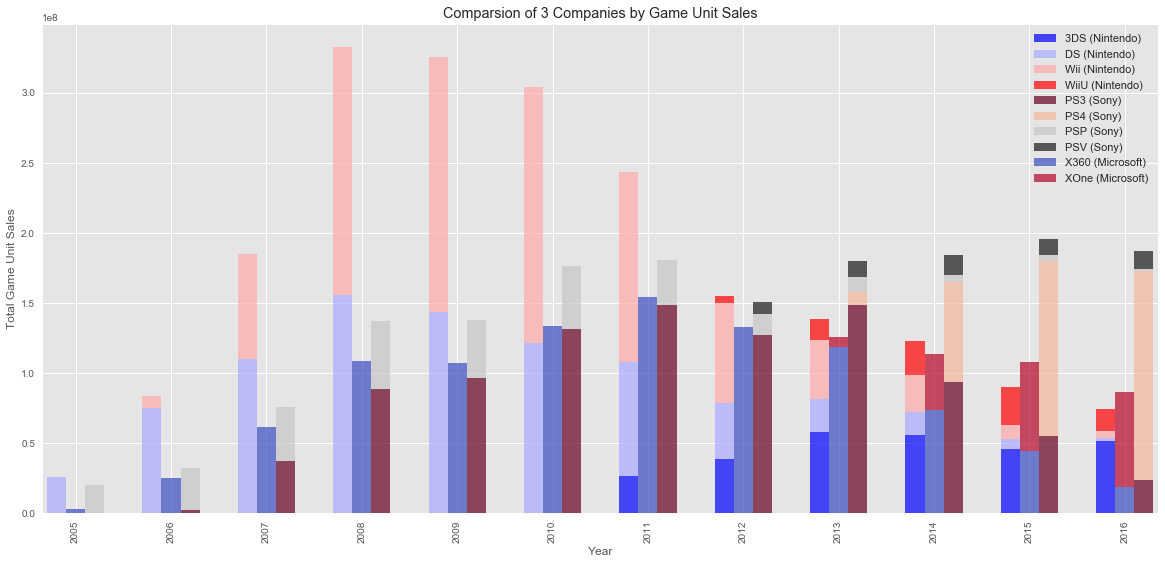

In [89]:
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['3DS', 'DS','Wii', 'WiiU']].plot.bar(stacked=True, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)
ax = dfpsall[['PS3', 'PS4', 'PSP', 'PSV']].plot.bar(stacked=True, width=0.2, position=-0.5, colormap="RdGy", ax=ax, alpha=0.7)
ax = dfpsall[['X360', 'XOne']].plot.bar(stacked=True, width=0.2, position=0.5, colormap="coolwarm", ax=ax, alpha=0.7)


ax.set_xlabel("Year")
ax.set_ylabel("Total Game Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_title('Comparsion of 3 Companies by Game Unit Sales')
plt.legend(['3DS (Nintendo)', 'DS (Nintendo)','Wii (Nintendo)', 'WiiU (Nintendo)', 
            'PS3 (Sony)', 'PS4 (Sony)', 'PSP (Sony)', 'PSV (Sony)', 'X360 (Microsoft)', 'XOne (Microsoft)']
           , loc='best',prop={'size':11})
ax


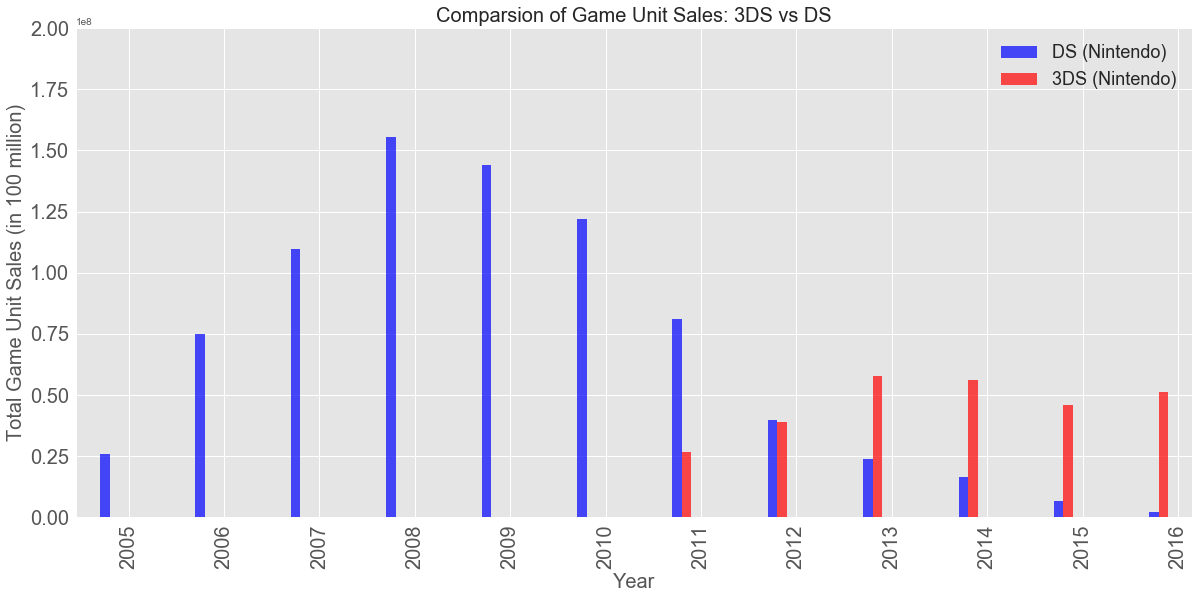

In [108]:
#3DS, DS 
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['DS', '3DS']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Game Unit Sales (in 100 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=20)
ax.set_ylim([0,200000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Game Unit Sales: 3DS vs DS', fontsize=20)
plt.legend(['DS (Nintendo)', '3DS (Nintendo)']
           , loc='best',prop={'size':18})
ax


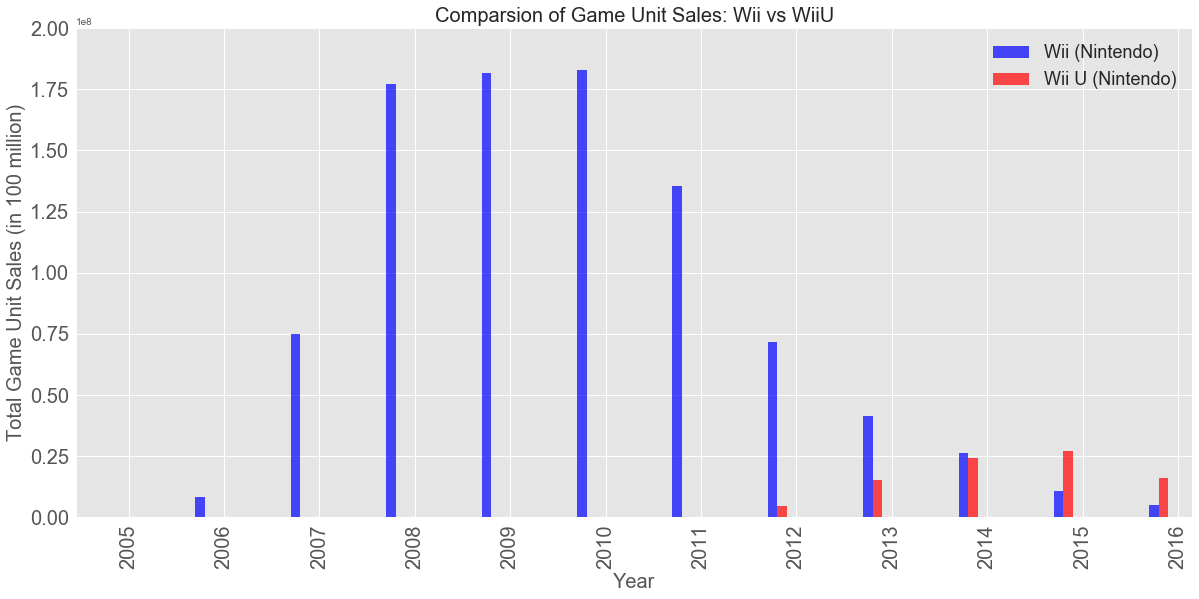

In [107]:
#Wii, WiiU 
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['Wii', 'WiiU']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Game Unit Sales (in 100 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=20)
ax.set_ylim([0,200000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Game Unit Sales: Wii vs WiiU', fontsize=20)
plt.legend(['Wii (Nintendo)', 'Wii U (Nintendo)']
           , loc='best',prop={'size':18})
ax


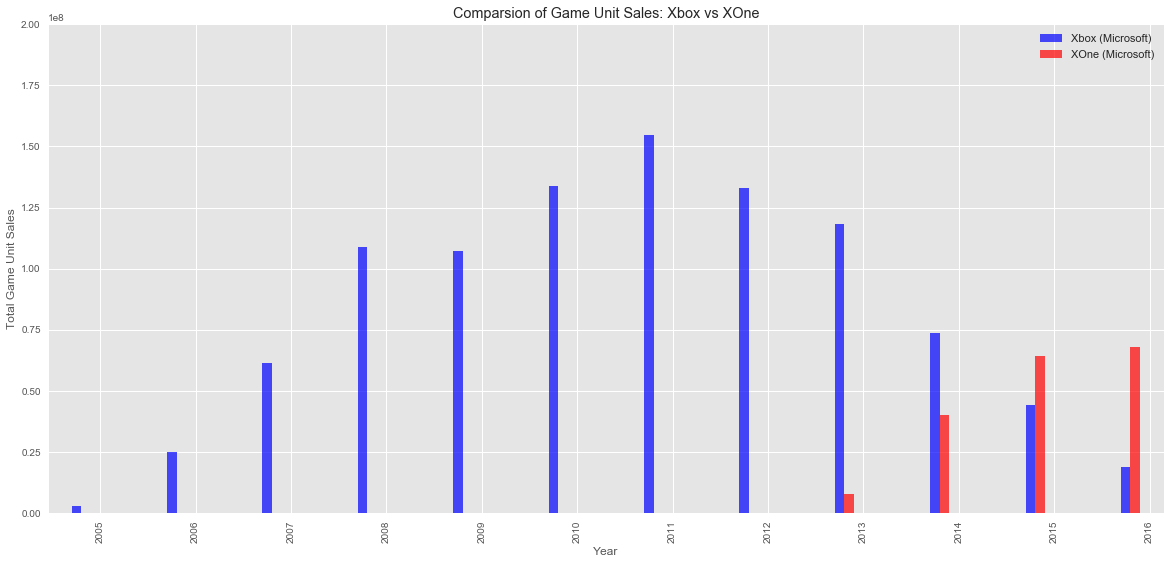

In [92]:
#Xbox, XOne
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['X360', 'XOne']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year")
ax.set_ylabel("Total Game Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_ylim([0,200000000])
ax.set_title('Comparsion of Game Unit Sales: Xbox vs XOne')
plt.legend(['Xbox (Microsoft)', 'XOne (Microsoft)']
           , loc='best',prop={'size':11})
ax

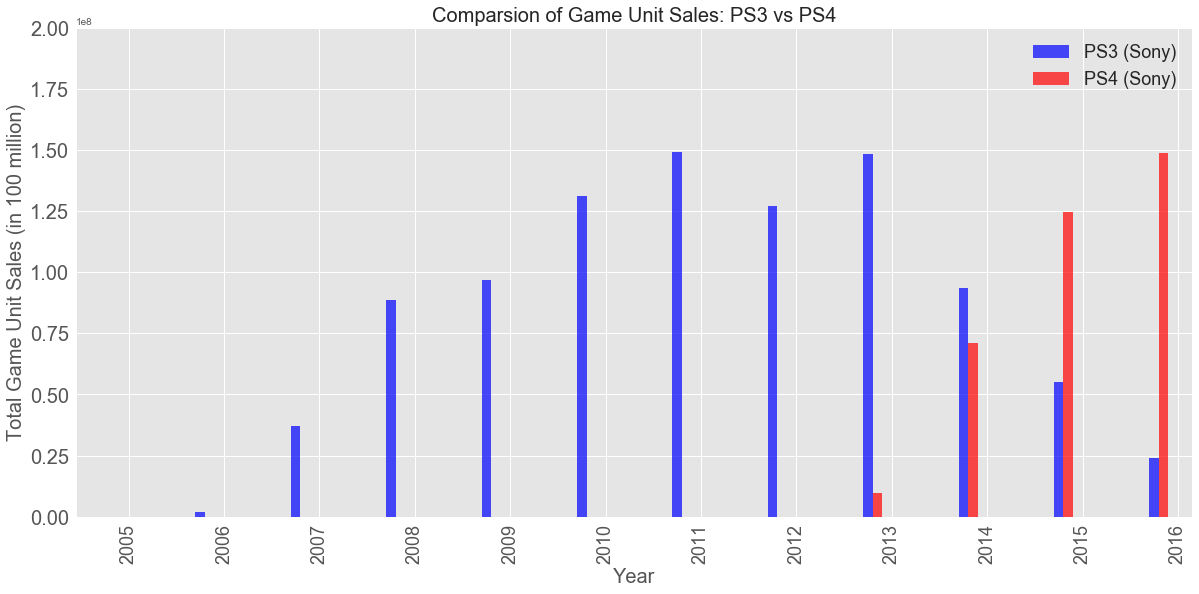

In [106]:

#PS3, PS4
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['PS3', 'PS4']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Game Unit Sales (in 100 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=18)
ax.set_ylim([0,200000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Game Unit Sales: PS3 vs PS4', fontsize=20)
plt.legend(['PS3 (Sony)', 'PS4 (Sony)']
           , loc='best',prop={'size':18})
ax


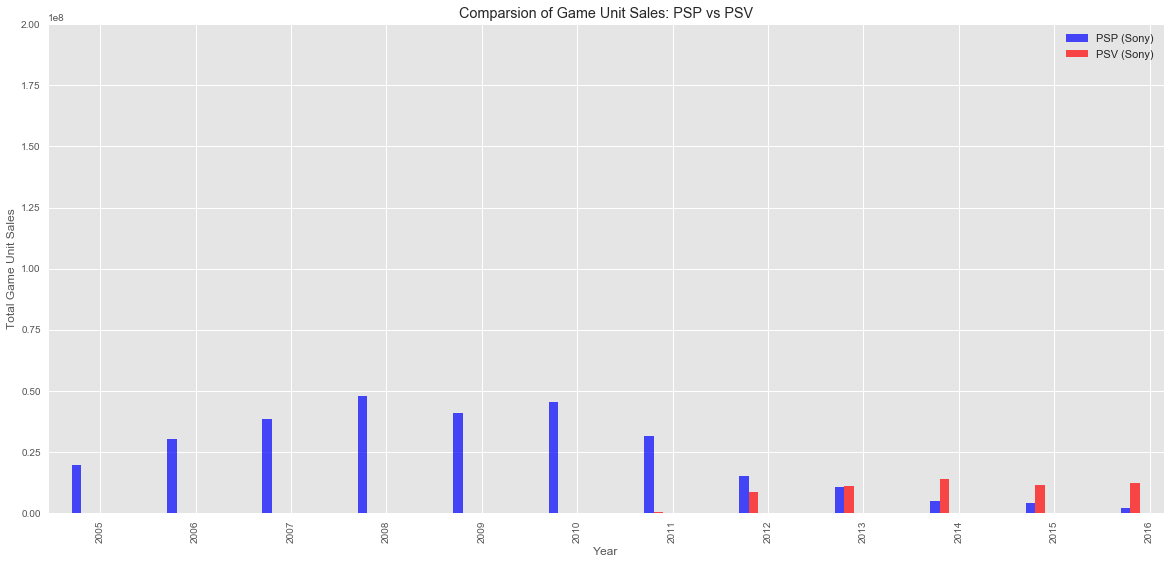

In [94]:
#PSP, PSV
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['PSP', 'PSV']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year")
ax.set_ylabel("Total Game Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_ylim([0,200000000])
ax.set_title('Comparsion of Game Unit Sales: PSP vs PSV')
plt.legend(['PSP (Sony)', 'PSV (Sony)']
           , loc='best',prop={'size':11})
ax

In [95]:
#Top 100's software sales is how many percentage of total software sales
#create pivot table (Platform vs Total Sales)
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Yearly', index=['Platform'], aggfunc='sum')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16], axis=1)
pd.options.display.float_format = '{:,.0f}'.format
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
dfps = df.fillna(0) #Platform, Sales
dfps100 = dfps.transpose()
dfps100.reset_index(level=0, inplace=True)
dfps100 = dfps100.rename(columns = {'index':'Year'})
dfps100

,Year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2005,0,"22,769,852","568,968",0,0,"17,753,295",0,0,0,"2,274,254",0
1,2006,0,"60,051,250","374,837","426,417",0,"13,669,248",0,"5,984,058",0,"16,931,193",0
2,2007,0,"63,479,020","1,457,750","17,261,715",0,"11,291,102",0,"51,817,129",0,"35,199,663",0
3,2008,0,"69,896,460",0,"33,566,602",0,"11,238,327",0,"100,205,573",0,"52,583,022",0
4,2009,0,"52,038,119","1,223,662","39,530,023",0,"3,763,610",0,"90,075,853",0,"53,754,249",0
5,2010,0,"37,642,930","5,858,869","62,844,153",0,"8,875,561",0,"87,975,216",0,"66,921,651",0
6,2011,"13,844,566","15,751,080","7,134,078","65,066,749",0,0,0,"56,815,721",0,"80,532,822",0
7,2012,"19,492,044","8,834,672","8,221,018","56,103,455",0,0,0,"27,881,707","2,714,853","67,163,232",0
8,2013,"36,441,626","1,242,092","3,402,386","70,733,409","6,529,590",0,0,"10,937,338","8,119,304","59,673,696","3,271,082"
9,2014,"34,667,549",0,"2,746,829","29,393,012","56,391,176",0,0,"2,362,326","13,635,635","21,700,040","25,726,012"


In [96]:
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
dict = {"3DS" : "3DS", "DS" : "DS", "PS3" : "PS3", "PSP" : "PSP", "PSV" : "PSV"
       , "Wii" : "Wii", "WiiU" : "WiiU", "X360" : "X360", "XOne" : "XOne"}

df_percentage = pd.concat([pd.Series(dfps100[k]/dfpsall[v], name=k) for k,v in dict.items()], axis=1)
pd.options.display.float_format = '{0:.1%}'.format
df_percentage = df_percentage.reindex(columns=dfps100.columns).fillna(0)

for i in range(len(year)):
    df_percentage['Year'][i] = year[i]

df_percentage['Year'] = df_percentage['Year'].apply(int).apply(str)
print("(top 100 sales / total sales)%")
df_percentage

(top 100 sales / total sales)%


,Year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2005,0.0%,88.2%,0.0%,0.0%,0.0%,89.0%,0.0%,0.0%,0.0%,79.8%,0.0%
1,2006,0.0%,80.2%,0.0%,21.0%,0.0%,45.1%,0.0%,70.8%,0.0%,67.2%,0.0%
2,2007,0.0%,57.8%,0.0%,46.4%,0.0%,29.2%,0.0%,69.3%,0.0%,57.3%,0.0%
3,2008,0.0%,45.0%,0.0%,37.8%,0.0%,23.4%,0.0%,56.6%,0.0%,48.3%,0.0%
4,2009,0.0%,36.1%,0.0%,40.8%,0.0%,9.2%,0.0%,49.6%,0.0%,50.2%,0.0%
5,2010,0.0%,30.9%,0.0%,47.9%,0.0%,19.6%,0.0%,48.2%,0.0%,50.1%,0.0%
6,2011,51.7%,19.4%,0.0%,43.7%,0.0%,0.0%,0.0%,41.9%,0.0%,52.1%,0.0%
7,2012,50.1%,22.2%,0.0%,44.2%,0.0%,0.0%,0.0%,38.9%,60.2%,50.6%,0.0%
8,2013,63.1%,5.2%,0.0%,47.7%,0.0%,0.0%,0.0%,26.3%,53.8%,50.4%,42.2%
9,2014,61.9%,0.0%,0.0%,31.4%,0.0%,0.0%,0.0%,8.9%,56.6%,29.4%,64.2%
